In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

In [63]:
df = pd.read_csv("online_shoppers_intention.csv")

# 1. data overview

Let's first check the basics of the dataset - the rows, columns, datatypes and null values.

In [40]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [39]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# check na values
df.isna().sum()

The dataset is pretty clean and ready for the next steps - let's see how each column is distributed.

Administrative


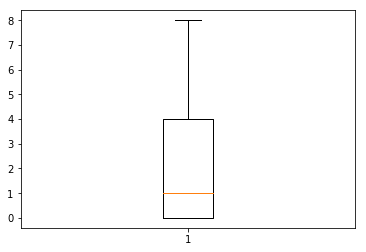

Administrative_Duration


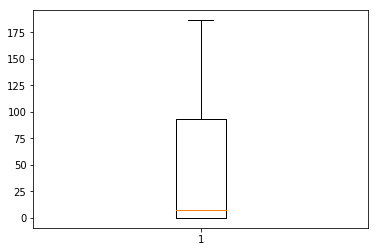

Informational


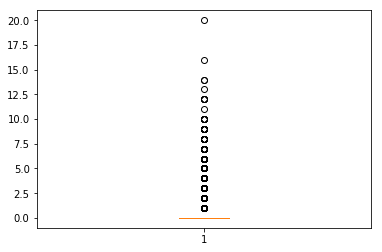

Informational_Duration


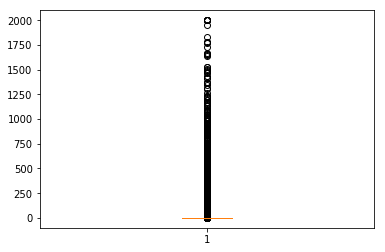

ProductRelated


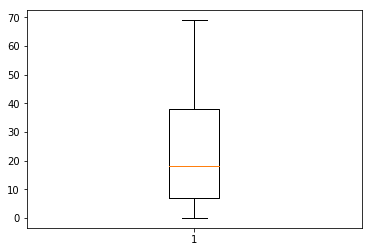

ProductRelated_Duration


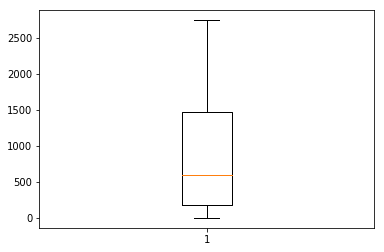

BounceRates


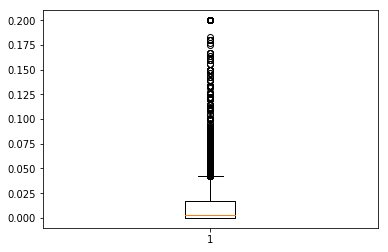

ExitRates


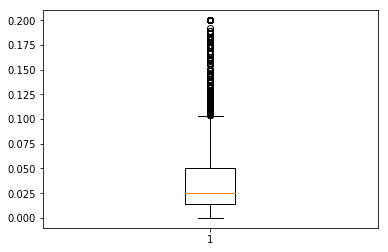

PageValues


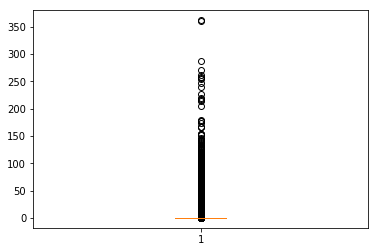

SpecialDay


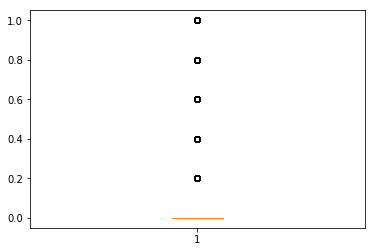

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


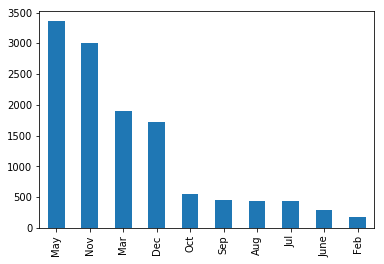

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


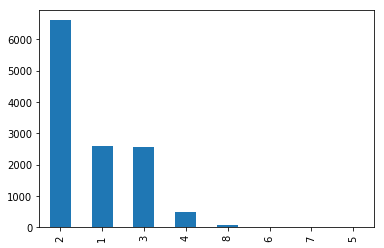

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


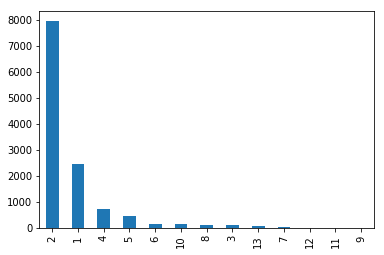

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


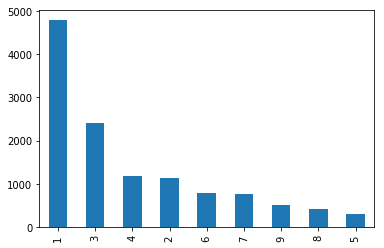

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


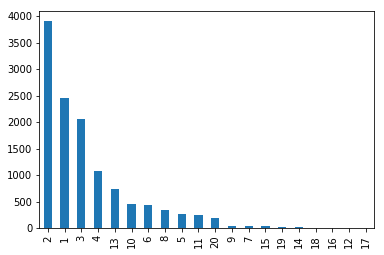

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


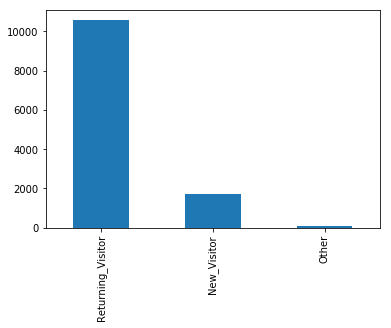

Weekend
False    9462
True     2868
Name: Weekend, dtype: int64


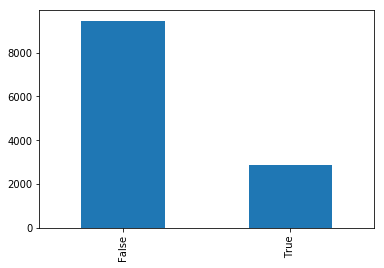

Revenue
False    10422
True      1908
Name: Revenue, dtype: int64


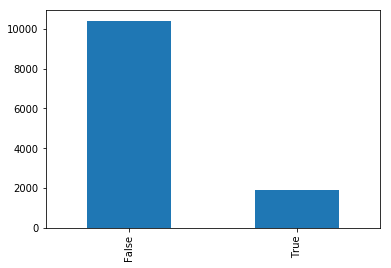

In [83]:
# type casting - bar charts for categorical columns, boxplots for numeric
cat_col = df.columns[10:16]
num_col = df.columns[0:10]
bin_col = df.columns[16:18]
for i in num_col:
    print (i)
    plt.boxplot(df[i])
    plt.show()
for i in cat_col:
    df[i] = df[i].astype("category")
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()
for i in bin_col:
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()


intersting findings: 
1. We see outliers existed in most numerical columns, especially those about page durations. It's unlikely that a person will have a session longer than hours, so we need to handle this outliers later.
2. For most categorical variables, there're some main groups, and a small number of data spreaded out in other groups. To avoid a sparse dataset after one hot encoding, we can group the small categories into one.
3. The positive class is about 15%. We may need to avoid using accuracy, over-sample the minority class or do something else to handle the class imblance issue.

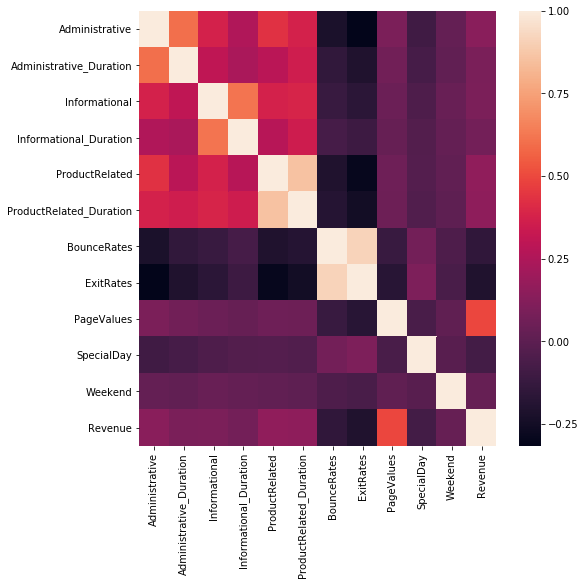

In [58]:
# check correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [57]:
df.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

We can see the correlation as a bivariate analysis. The heatmap shows us:

1. the visited page types are correlated with the respective duration. The 3 sets of variables are all correlated among them. 
2. PageValues is the most positively correlated to the lable, Revenue. Bounce rate and Exit rate are the most negatively correlated factors.

# 2. Modelling

## 2.1 outliers

In [85]:
new_df = df
# assign outliers to new values - q3+1.5*iqr
for i in ["Administrative","Administrative_Duration","ProductRelated","ProductRelated_Duration"]:
    cap = df[i].quantile(0.75)+(df[i].quantile(0.75)-df[i].quantile(0.25))
    new_df[i]=new_df[i].apply(lambda x: min(x, cap))
# for information and its duration, the iqr is rather small, so we can set the cap according to the visualization
new_df["Informational"] = new_df["Informational"].apply(lambda x: min(x, 20))
new_df["Informational_Duration"] = new_df["Informational_Duration"].apply(lambda x: min(x, 2000))


## 2.2  add new features

In [86]:
new_df["total_pages"] = new_df["Administrative"]+ new_df["ProductRelated"] + new_df["Informational"]
new_df["total_duration"] = new_df["Administrative_Duration"]+ new_df["ProductRelated_Duration"] + new_df["Informational_Duration"]

In [87]:
new_df["SpecialOrNot"] = np.where(new_df["SpecialDay"]>0,1,0)

In [88]:
new_df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_pages,total_duration,SpecialOrNot
0,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,1.0,0.000000,0
1,0.0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,2.0,64.000000,0
2,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,1.0,0.000000,0
3,0.0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,2.0,2.666667,0
4,0.0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,10.0,627.500000,0
5,0.0,0.0,0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2,2,1,3,Returning_Visitor,False,False,19.0,154.216667,0
6,0.0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,2,4,3,3,Returning_Visitor,False,False,1.0,0.000000,1
7,1.0,0.0,0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,1,2,1,5,Returning_Visitor,True,False,1.0,0.000000,0
8,0.0,0.0,0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2,2,2,3,Returning_Visitor,False,False,2.0,37.000000,1
9,0.0,0.0,0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,...,2,4,1,2,Returning_Visitor,False,False,3.0,738.000000,1


In [90]:
# one hot encoding
df_ohe = pd.get_dummies(new_df)

In [80]:
df_ohe.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'total_pages', 'total_duration', 'SpecialOrNot', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [92]:
# prepare train, test and scale the data
y = df_ohe['Revenue']
X = df_ohe.drop('Revenue', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [93]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [94]:
logreg = LogisticRegressionCV(scoring = 'f1')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase t

precision:  0.7161572052401747
recall:  0.36936936936936937
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2639
        True       0.72      0.37      0.49       444

   micro avg       0.89      0.89      0.89      3083
   macro avg       0.81      0.67      0.71      3083
weighted avg       0.88      0.89      0.87      3083



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [95]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

precision:  0.732484076433121
recall:  0.5180180180180181
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2639
        True       0.73      0.52      0.61       444

   micro avg       0.90      0.90      0.90      3083
   macro avg       0.83      0.74      0.78      3083
weighted avg       0.90      0.90      0.90      3083



In [96]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

precision:  0.1606484893146647
recall:  0.9819819819819819
              precision    recall  f1-score   support

       False       0.98      0.14      0.24      2639
        True       0.16      0.98      0.28       444

   micro avg       0.26      0.26      0.26      3083
   macro avg       0.57      0.56      0.26      3083
weighted avg       0.86      0.26      0.25      3083



Judging by the results from the vanila models, Random Forest is the one has the highest F1 score, and Naive Bayes also has impressive recall compared to the other 2 models. We will spend sometime on these 2 later.

Using rfc model, we can predict the conversion rate on the test population:

In [97]:
y_pred = rfc.predict(X_test_scaled)
print ("the predicted conversion rate is", y_pred.mean())
print ("the actual conversion rate is", y_test.mean())

the predicted conversion rate is 0.10184884852416477
the actual conversion rate is 0.1440155692507298


Next, we can take a closer look at the factors and how the models weighs them:

In [98]:
coef = logreg.coef_[0]
# plt.figure(figsize=(20,20))
# plt.barh(y=X.columns,width = coef)
# plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))

PageValues                28.77055066749881
TrafficType_15            -4.935607889893639
TrafficType_19            -4.211394569659715
TrafficType_18            -3.56793014267367
TrafficType_16            3.2954058682194787
ExitRates                 -2.5285952823438382
Browser_12                2.089398134517285
Browser_11                -1.817090752522447
OperatingSystems_5        -1.817090752522447
OperatingSystems_7        1.5688916660132137


precision:  0.7467105263157895
recall:  0.5112612612612613


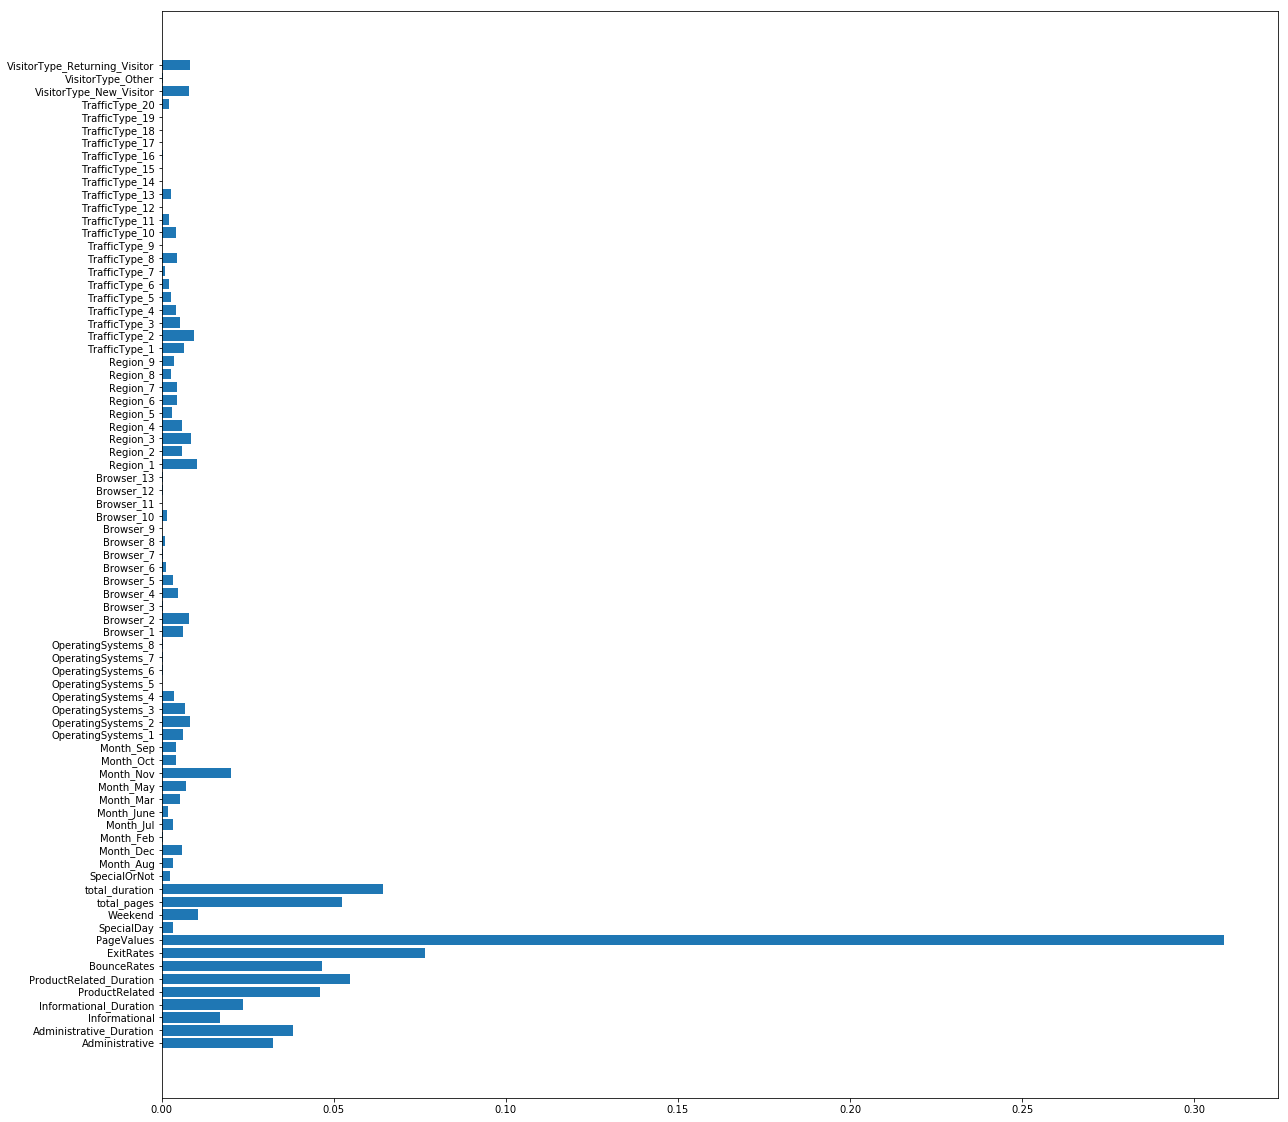

PageValues                0.3087369359563563
ExitRates                 0.0764729370985332
total_duration            0.06418897655073902
ProductRelated_Duration   0.05464917606392373
total_pages               0.052423235879561415
BounceRates               0.04669439187428574
ProductRelated            0.045990737112351354
Administrative_Duration   0.038162595155637635
Administrative            0.032469810368429275
Informational_Duration    0.02365442910345724


In [99]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
coef = rfc.feature_importances_
plt.figure(figsize=(20,20))
plt.barh(y=X.columns,width = coef)
plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))